In [3]:
import os
import pandas as pd

In [2]:
DATA_IN_PATH = './data_set'
os.listdir(DATA_IN_PATH)

['.DS_Store',
 'sampleSubmission.csv',
 'labeledTrainData.tsv',
 'word2vecnlptutorial1.zip',
 'testData.tsv',
 'pima-indians-diabetes.csv',
 'unlabeledTrainData.tsv',
 'word2vecnlptutorial1']

In [5]:
train_data = pd.read_csv(DATA_IN_PATH + '/labeledTrainData.tsv', delimiter = '\t', header = 0 , quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## EDA

In [8]:
import matplotlib.pyplot as plt

In [6]:
train_data['review'].apply(len)

0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

In [7]:
train_length = train_data['review'].apply(len)

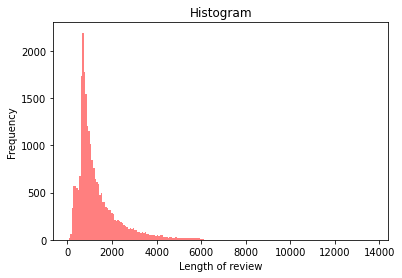

In [10]:
plt.hist(train_length, bins = 200 , alpha = 0.5, color = 'r', label = 'alhabet')

plt.title('Histogram')
plt.xlabel('Length of review')
plt.ylabel('Frequency')

plt.show()

In [12]:
import numpy as np

In [21]:
print('문장 최대길이 : {}'.format(np.max(train_length)))
print('문장 최소길이 : {}'.format(np.min(train_length)))
print('문장 평균길이 : {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(train_length)))
print('문장 중간 길이 : {}'.format(np.median(train_length)))

# 사분위의 대한 경우는 0 ~ 100 스케일로 되어있음
print('제 1 사분위 길이 : {}'.format(np.percentile(train_length, 25)))
print('제 3 사분위 길이 : {}'.format(np.percentile(train_length, 75)))

문장 최대길이 : 13710
문장 최소길이 : 54
문장 평균길이 : 1329.71
문장 길이 표준편차 : 1005.22
문장 중간 길이 : 983.0
제 1 사분위 길이 : 705.0
제 3 사분위 길이 : 1619.0


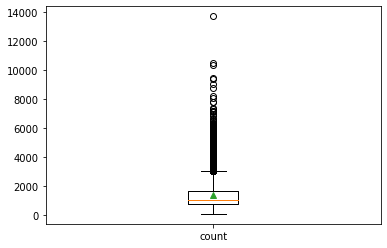

In [16]:
plt.boxplot(train_length, labels = ['count'], showmeans = True)
plt.show()

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
my_text = ' '.join(train_data['review'])
wordcloud = WordCloud(stopwords = STOPWORDS, width = 800, height = 600)
wordcloud_graph = wordcloud.generate(my_text)

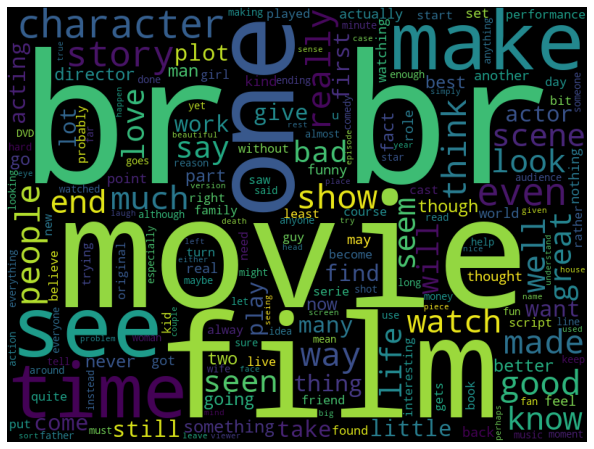

In [20]:
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_graph)
plt.axis('off')
plt.show()

In [22]:
import seaborn as sns

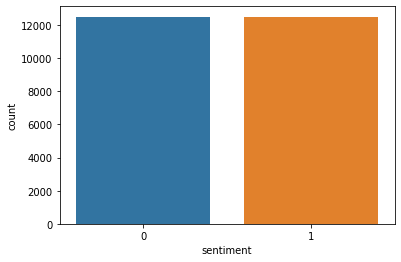

In [24]:
fig, axe = plt.subplots(ncols = 1)
sns.countplot(x = 'sentiment', data = train_data)
plt.show()

In [25]:
train_data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [27]:
train_word_counts = train_data['review'].apply(lambda x : len(x.split(' ')))
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

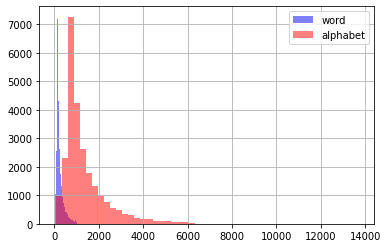

In [29]:
plt.hist(train_word_counts , bins = 50, alpha = 0.5, color = 'b', label = 'word')
plt.hist(train_length , bins = 50, alpha = 0.5, color = 'r', label = 'alphabet')

plt.legend()
plt.grid()
plt.show()

In [30]:
train_data['review'].apply(lambda x : '?' in x) # True or False 로 반환

0         True
1        False
2        False
3         True
4         True
         ...  
24995    False
24996    False
24997    False
24998     True
24999    False
Name: review, Length: 25000, dtype: bool

In [35]:
qmark = np.mean(train_data['review'].apply(lambda x : '?' in x))
dotmark = np.mean(train_data['review'].apply(lambda x : '.' in x))
capital = np.mean(train_data['review'].apply(lambda x : x[1].isupper()))
digit = np.mean(train_data['review'].apply(lambda x : x.isdigit()))
all_capital = np.mean(train_data['review'].apply(lambda x : x.isupper()))

print('문장 중 ? 비율 : {:2f}%'.format(qmark * 100))
capital

문장 중 ? 비율 : 29.552000%


0.92844

In [36]:
!pip install BeautifulSoup4

  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)


In [37]:
from bs4 import BeautifulSoup

In [38]:
import json
from nltk.corpus import stopwords

In [40]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, 'html').get_text()
print(review_text)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

## 제거 하는 word => stopword 이용

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
stop_words = set(stopwords.words('english'))

review_text = review_text.lower()
word = review_text.split()

word = [w for w in word if w not in stop_words]

## train data

In [53]:
import re
def preprocessing(review, remove_stopword = True) :
    review_text = BeautifulSoup(review, 'html').get_text()
    
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    
    word = review_text.lower().split()
    
    if remove_stopword :
        stop_words = set(stopwords.words('english'))
        word = [w for w in word if w not in stop_words]
        
        clean_review = ' '.join(word)

    else :
        clean_review = ' '.join(word)
        
    return clean_review

In [55]:
clean_train_review = []

for review in train_data['review'] :
    clean_train_review.append(preprocessing(review))
    
len(clean_train_review)

25000

In [56]:
clean_train_review[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [57]:
train_data['sentiment'] # target

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64

In [121]:
clean_train_df = pd.DataFrame({'review' : clean_train_review, 'sentiment' : train_data['sentiment']})
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [122]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [123]:
tokenizer.fit_on_texts(clean_train_review)
text_sequences = tokenizer.texts_to_sequences(clean_train_review)

tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [67]:
word_vocab = dict(tokenizer.word_index)
word_vocab['<PAD>'] = 0
word_vocab['<PAD>']

0

In [68]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

data_configs

{'vocab': {'movie': 1,
  'film': 2,
  'one': 3,
  'like': 4,
  'good': 5,
  'time': 6,
  'even': 7,
  'would': 8,
  'story': 9,
  'really': 10,
  'see': 11,
  'well': 12,
  'much': 13,
  'get': 14,
  'bad': 15,
  'people': 16,
  'also': 17,
  'first': 18,
  'great': 19,
  'made': 20,
  'way': 21,
  'make': 22,
  'could': 23,
  'movies': 24,
  'think': 25,
  'characters': 26,
  'character': 27,
  'watch': 28,
  'two': 29,
  'films': 30,
  'seen': 31,
  'many': 32,
  'life': 33,
  'plot': 34,
  'acting': 35,
  'never': 36,
  'love': 37,
  'little': 38,
  'best': 39,
  'show': 40,
  'know': 41,
  'ever': 42,
  'man': 43,
  'better': 44,
  'end': 45,
  'still': 46,
  'say': 47,
  'scene': 48,
  'scenes': 49,
  'go': 50,
  'something': 51,
  'back': 52,
  'real': 53,
  'watching': 54,
  'though': 55,
  'thing': 56,
  'old': 57,
  'years': 58,
  'actors': 59,
  'director': 60,
  'work': 61,
  'another': 62,
  'new': 63,
  'nothing': 64,
  'funny': 65,
  'actually': 66,
  'makes': 67,
  'look

### 문장의 길이가 다르기 때문에 최대 문장 길이를 선언
문장의 길이가 짧다면 0로 패딩 / 문장이 길이가 길다면 자른다

In [69]:
MAX_SEQUENCE_LENGTH = 174

train_inputs = tf.keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')

In [72]:
train_inputs.shape
train_inputs[1]

array([  232,   203,  3048,  3565,  7116,   317,     2,   405,   153,
          19,   634, 10967, 11898,  8816,  1653,  1035,  3494,   232,
         154,   314,  7116,  2701,   178,     2,  2349,    87,  1111,
         582,   217,  2219,   149,    73,   160,   626,  1035,  2882,
         194,   642,  3316,  3464,  3869,   154,   405,   180,   155,
         158,    79,     1, 19718,  2177,  1251,    68,  6828,   170,
         281,   811,     1,   532, 10968,     4,  2003,    16,    36,
         881,  1251,   376,   634,   314,  7116,   159,  2564,  1653,
        1035,  3494,   232,   511,   143,   317,    20,   623,  4628,
        1251,  8974,  5471,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [75]:
train_labels = np.array(train_data['sentiment'])

In [74]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEl_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

In [76]:
np.save(open('./data_out/' + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open('./data_out/' + TRAIN_LABEl_DATA, 'wb'), train_labels)

clean_train_df.to_csv('./data_out/' + TRAIN_CLEAN_DATA, index = False)

json.dump(data_configs, open('./data_out/' + DATA_CONFIGS, 'w'))

## test data 

In [110]:
test_data = pd.read_csv('./data_set/testData.tsv', header = 0, delimiter = '\t', quoting = 3)
test_data.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [111]:
clean_test_reviews = []
for review in test_data['review'] :
    clean_test_reviews.append(preprocessing(review, remove_stopword=True))

/Users/kimhyunjo/opt/anaconda3/envs/nbkim/lib/python3.6/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [118]:
clean_test_reviews

['naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty',
 'movie disaster within disaster film full great action scenes meaningful throw away sense reality let see word wise lava burns steam burns stand next lava diverting minor lava flow difficult let alone significant one scares think might actually believe saw movie even worse significant amount talent went making film mean acting actually good effects average hard believe somebody read scripts allowed talent wasted guess suggestion would movie start 

In [126]:
clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id':test_data['id']})

text_seq = tokenizer.texts_to_sequences(clean_test_reviews)

test_inputs = tf.keras.preprocessing.sequence.pad_sequences(text_seq, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')

test_id = np.array(test_data['id'])

In [127]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'
TEST_CLEAN_DATA = 'test_clean.csv'

np.save(open('./data_out/' + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open('./data_out/' + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv('./data_out/' + TEST_CLEAN_DATA, index = False)